In [1]:
ENV["PROJECT_PATH_ED"]="../envs/KED"

include("../src/mybase.jl")


######## Correlated Orbital Info #########
norb    = 1
nspin   = 2
nspinorb    = norb * nspin

# IndOrbUp, IndOrbDn = GetOrbUpDn( nspinorb )
IndOrbUp    = [ i for i in 1:2:nspinorb ]
IndOrbDn    = [ i for i in 2:2:nspinorb ]


######## Imaginary Frequency Green Function Construction #########
beta    = 100
NImFreq  = 4*beta
ImFreqGridVal   = GetImFreqValGrid( beta, NImFreq )
ImFreqGrid      = ImFreqGridVal * im
# Hybiwup_init  = 1. / 4 * GetGzBetheUniformScaling.( ImFreqGrid )
# Hybiwdn_init  = 1. / 4 * GetGzBetheUniformScaling.( ImFreqGrid )
D   = 1
gbetheiw    = GetGzBetheDim.( ImFreqGrid, nspinorb ; D=D )
gbetheiwup  = GetGzBetheUniformScaling.( ImFreqGrid ; D=D )
Hybiw       = 1. / 4 * GetGzBetheDim.( ImFreqGrid, nspinorb ; D=D )

  Activating project at `~/dmft/ed/github/KaiED/envs/KED`


400-element Vector{Diagonal{ComplexF64, Vector{ComplexF64}}}:
 [0.0 - 0.4845387159914213im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.4845387159914213im]
 [0.0 - 0.45509186163197296im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.45509186163197296im]
 [0.0 - 0.4275910982966573im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.4275910982966573im]
 [0.0 - 0.4019917792311983im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.4019917792311983im]
 [0.0 - 0.3782300520176767im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.3782300520176767im]
 [0.0 - 0.35622615936833324im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.35622615936833324im]
 [0.0 - 0.3358882091647258im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.3358882091647258im]
 [0.0 - 0.3171160435593836im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.3171160435593836im]
 [0.0 - 0.2998048945367785im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.2998048945367785im]
 [0.0 - 0.2838486032153602im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.2838486032153602im]
 [0.0 - 0.26914227757644593im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 0.26914227757644593im]
 [0.0 - 0.2555843494152694im 0

In [2]:
######## Bath Orbital Info #########
nbath   = 6
ntot    = nspinorb + nbath
dim     = 2^ntot
@show dim
nbathHalf   = div(nbath,2)
# IndBathUp, IndBathDn = GetOrbUpDn( nbath )
IndBathUp   = [ i for i in 1:2:nbath ]
IndBathDn   = [ i for i in 2:2:nbath ]

ebathl     = zeros(nbath)
ebathl     = collect(LinRange( -1, 1, nbath ))
@show ebathl

Vil     = zeros(nspinorb,nbath)
for i in 1:nspinorb
    for j in 1:nbath
        Vil[i,j]    = ebathl[j]
    end
end
println( "Vil : " ) ; writedlm(stdout, Vil)

dim = 256
ebathl = [-1.0, -0.6000000000000001, -0.19999999999999996, 0.19999999999999996, 0.6000000000000001, 1.0]
Vil : 
-1.0	-0.6000000000000001	-0.19999999999999996	0.19999999999999996	0.6000000000000001	1.0
-1.0	-0.6000000000000001	-0.19999999999999996	0.19999999999999996	0.6000000000000001	1.0


In [ ]:
######## Bath Discretization Setup (Spin-up/dn) #########
ebathlnew, Vilnew   = BathDiscHybSpinPH( ebathl, Vil, Hybiw, ImFreqGrid )

In [4]:
ShowBathParam( ebathlnew, Vilnew )


ebathl : [-0.2889463982659628, -0.2889379956440348, 0.0, 0.0, 0.2889463982659628, 0.2889379956440348]
Vil    : 
-0.32330339120163	0.0	-0.11696090169068467	0.0	0.3233168640279126	0.0
0.0	-0.32330128714081374	0.0	0.11695325465354933	0.0	0.3233073832238309



In [ ]:
######## Setting Up Hamiltonian Operators #########
U           = 0
JHund       = 0
chem        = 0.5*U # 0.5*U for single-band, 2.5*U-5.0*JHund for t2g-multiband
opcavec     = [ GetOpBathParam(ebathlnew, Vilnew, ibath->ibath+nspinorb),
                GetOpChemPot(chem, nspinorb) ]
opccaavec   = [ GetOpUSlaterKanamori( ; U=U, JHund=JHund, norb=norb ) ]
# @show typeof(opcavec)
# @show typeof(opccaavec)
# @show opcavec
# @show opccaavec

######## Fock/Hilbert Space Construction #########
outputlevel = 0

######## Searching Ground-sector #########
Emin_arr    = SearchGSSector( ntot, opcavec, opccaavec ; outputlevel=1 )

In [6]:
@show Emin_arr

Emin_arr = [0.0, -0.5499526187424102, -1.0998951875081724, -1.1613504633916045, -1.2227990079140207, -1.1613542768166942, -1.0999074289344644, -0.5499610467430405, 0.0]


9-element Vector{Float64}:
  0.0
 -0.5499526187424102
 -1.0998951875081724
 -1.1613504633916045
 -1.2227990079140207
 -1.1613542768166942
 -1.0999074289344644
 -0.5499610467430405
  0.0

In [7]:
######## Choosing Ground-sectors #########
# IndGSSector = [ [ isector, e0, boltzweight ] ]
iGSSector   = argmin(Emin_arr)

5

In [ ]:
######## Accurate Hamiltonian Diagonalization (for the choosen sectors) #########
esyssec_AR = GetGSFromSector( iGSSector, ntot, opcavec, opccaavec ; outputlevel=1 )

In [9]:
######## Boltzmann Weight #########
# IndGSSector = [ [ isector, e0, boltzweight, evec ] ]
ieval        = 1
wBoltz = 1.0 
IndGSSector = [ [ iGSSector, esyssec_AR[1][ieval], wBoltz, esyssec_AR[2][:,ieval] ] ]

1-element Vector{Vector{Any}}:
 [5, -1.2227990079140225 + 5.1486621650975586e-17im, 1.0, ComplexF64[-0.260695575469497 + 0.22761582886102072im, -2.260262937691615e-16 + 2.369256273438427e-17im, -0.16568949425341112 + 0.1446651002807914im, 1.7992212217479846e-16 - 1.742257299934669e-17im, 0.2606796963395644 - 0.22760196463906446im, -0.1656986537830686 + 0.14467309755474353im, -1.0094747255942432e-16 - 1.527980601037776e-16im, 0.2606883899422291 - 0.22760955510765202im, 4.280925094563009e-18 + 1.0907387563623356e-16im, 0.10531258957634326 - 0.0919494407327392im  …  -0.10532613985068738 + 0.09196127160835178im, 4.7165011670984e-17 - 1.1321195291626346e-17im, -0.010637382566417806 + 0.009287601622721988im, -1.0154070189009404e-16 + 6.934480999411719e-17im, -0.0334709072298129 + 0.029223772893435966im, -0.010637737320465466 + 0.009287911361912858im, -5.914241733303072e-17 - 3.427952475152691e-17im, -0.03347275754487853 + 0.029225388421419505im, -8.588601093003635e-17 - 2.976187516412314e-17

In [ ]:
######## Impurity Green Function Construction #########
Gimp    = GetGreenImpurityFromGS(  nspinorb, IndGSSector[1], ntot, opcavec, opccaavec, ImFreqGrid )
gimpup  = GetijarrayFromVecMat( Gimp, 1, 1 )
gimpdn  = GetijarrayFromVecMat( Gimp, 2, 2 )

G0imp   = GetGreenDiscGrid( ebathlnew, Vilnew, ImFreqGrid, I(nspinorb)*chem )
g0impup = GetijarrayFromVecMat( G0imp, 1, 1 )
g0impdn = GetijarrayFromVecMat( G0imp, 2, 2 )

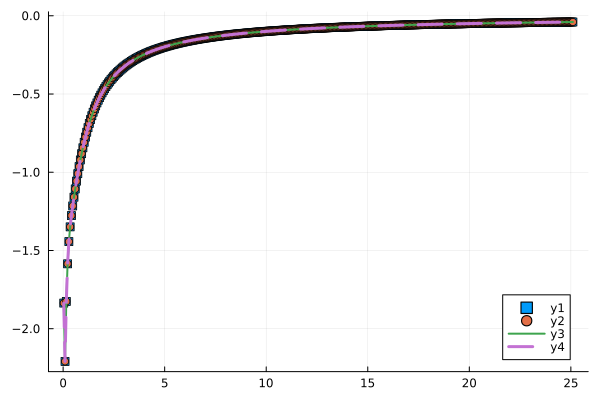

In [11]:
using Plots
plot( ImFreqGridVal, imag(gimpup) , lt=:scatter, marker=:square)
plot!( ImFreqGridVal, imag(gimpdn) , lt=:scatter, marker=:circle)
plot!( ImFreqGridVal, imag(g0impup), linewidth=2 )
plot!( ImFreqGridVal, imag(g0impdn), linewidth=3,line=:dash )

In [ ]:
selfup  = GetSelf( g0impup, gimpup )
selfdn  = GetSelf( g0impdn, gimpdn )

G0newimp    = GetGreenImpGrid( zeros(nspinorb,nspinorb), (D*D / 2. / 2. ) * Gimp, ImFreqGrid )

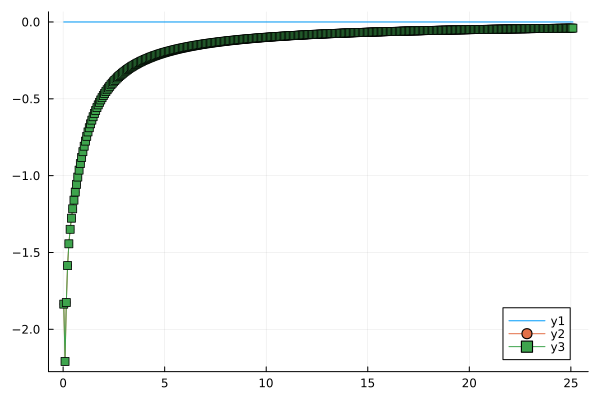

In [13]:
using Plots
plot( ImFreqGridVal, imag(selfup) )
plot!( ImFreqGridVal, imag(gimpdn) , marker=:circle)
plot!( ImFreqGridVal, imag(g0impup) , marker=:square)